<a href="https://colab.research.google.com/github/NEARBACK/BTC/blob/master/2016_Global_Ecological_Footprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
footprintnetwork_ecological_footprint_path = kagglehub.dataset_download('footprintnetwork/ecological-footprint')

print('Data source import complete.')


100%|██████████| 8.83k/8.83k [00:00<00:00, 6.30MB/s]

Extracting files...
Data source import complete.


Executive Summary
Project Overview: Global Ecological Footprint Analysis

This case study evaluates the relationship between national development metrics and environmental sustainability across the globe. By analyzing the interplay between the Human Development Index (HDI), Gross Domestic Product (GDP) per capita, and Ecological Footprint data, this report quantifies the disparity between resource consumption and natural regeneration (biocapacity).

Key Findings The analysis reveals a significant trade-off between economic prosperity and environmental sustainability. A strong positive correlation exists between high development markers (HDI and GDP) and increased ecological footprints, suggesting that current models of economic growth rely heavily on resource consumption. Consequently, 72.3% of nations currently operate in a biocapacity deficit. While specific territories such as French Guiana and Suriname maintain healthy reserves, major economic zones—led by North America and the Middle East—face substantial sustainability challenges.

Conclusion The data indicates that the global community is operating well beyond the Earth's regenerative capacity. As population density increases and developing nations strive for higher economic standards, this ecological deficit is projected to widen, necessitating urgent strategic shifts toward sustainable development models.

In [4]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

In [5]:
import os
global_eco_footprint = pd.read_csv(os.path.join(footprintnetwork_ecological_footprint_path, "countries.csv"))

In [6]:
global_eco_footprint.head(10)

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2
5,Argentina,Latin America,41.09,0.83,"$13,540.00",0.78,0.79,0.29,1.08,0.10,...,2.64,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.45,6
6,Armenia,Middle East/Central Asia,2.97,0.73,"$3,426.39",0.74,0.18,0.34,0.89,0.01,...,0.44,0.26,0.10,0.02,0.07,0.89,-1.35,1.29,2.52,3B
7,Aruba,Latin America,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.57,-11.31,6.86,20.69,2
8,Australia,Asia-Pacific,23.05,0.93,"$66,604.20",2.68,0.63,0.89,4.85,0.11,...,5.42,5.81,2.01,3.19,0.14,16.57,7.26,5.37,0.56,5
9,Austria,European Union,8.46,0.88,"$51,274.10",0.82,0.27,0.63,4.14,0.06,...,0.71,0.16,2.04,0.00,0.15,3.07,-3.00,3.50,1.98,5


In [7]:
global_eco_footprint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         188 non-null    object 
 1   Region                          188 non-null    object 
 2   Population (millions)           188 non-null    float64
 3   HDI                             172 non-null    float64
 4   GDP per Capita                  173 non-null    object 
 5   Cropland Footprint              173 non-null    float64
 6   Grazing Footprint               173 non-null    float64
 7   Forest Footprint                173 non-null    float64
 8   Carbon Footprint                173 non-null    float64
 9   Fish Footprint                  173 non-null    float64
 10  Total Ecological Footprint      188 non-null    float64
 11  Cropland                        173 non-null    float64
 12  Grazing Land                    173 

In [8]:
duplicates = global_eco_footprint.duplicated().sum()

duplicates

np.int64(0)

In [9]:
global_eco_footprint.isnull().sum()

,0
Country,0
Region,0
Population (millions),0
HDI,16
GDP per Capita,15
Cropland Footprint,15
Grazing Footprint,15
Forest Footprint,15
Carbon Footprint,15
Fish Footprint,15


In [10]:
global_eco_footprint_nan = global_eco_footprint[global_eco_footprint.isnull().any(axis=1)]

display(global_eco_footprint_nan)

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2
7,Aruba,Latin America,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.57,-11.31,6.86,20.69,2
18,Bermuda,North America,0.06,NaN,"$70,626.30",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.13,-5.64,3.33,44.05,3T
24,British Virgin Islands,Latin America,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.05,-0.81,1.65,1.40,3T
29,Cabo Verde,Africa,0.49,0.64,"$3,801.45",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.62,-1.90,1.46,4.06,3T
30,Cambodia,Asia-Pacific,14.86,0.55,$877.64,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.09,-0.11,0.70,1.11,3T
33,Cayman Islands,Latin America,0.06,NaN,NaN,0.36,0.45,1.23,3.56,0.05,...,0.00,0.02,0.19,0.11,0.00,0.32,-5.33,3.26,17.91,3L
43,Côte d'Ivoire,Africa,19.84,NaN,"$1,016.83",0.51,0.06,0.22,0.26,0.14,...,0.88,0.30,0.48,0.04,0.08,1.78,0.51,0.74,0.72,6
49,Djibouti,Africa,0.86,0.46,"$1,433.17",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.77,-1.42,1.27,2.84,2
57,Estonia,European Union,1.29,0.85,"$17,304.40",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.53,3.67,3.96,0.65,3T


In [11]:
global_eco_footprint_clean = global_eco_footprint.dropna()

In [12]:
global_eco_footprint_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 187
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         162 non-null    object 
 1   Region                          162 non-null    object 
 2   Population (millions)           162 non-null    float64
 3   HDI                             162 non-null    float64
 4   GDP per Capita                  162 non-null    object 
 5   Cropland Footprint              162 non-null    float64
 6   Grazing Footprint               162 non-null    float64
 7   Forest Footprint                162 non-null    float64
 8   Carbon Footprint                162 non-null    float64
 9   Fish Footprint                  162 non-null    float64
 10  Total Ecological Footprint      162 non-null    float64
 11  Cropland                        162 non-null    float64
 12  Grazing Land                    162 non-n

In [13]:
global_eco_bio_positive = global_eco_footprint[global_eco_footprint['Biocapacity Deficit or Reserve'] > 0]

global_eco_bio_positive.head(10)

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
5,Argentina,Latin America,41.09,0.83,"$13,540.00",0.78,0.79,0.29,1.08,0.10,...,2.64,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.45,6
8,Australia,Asia-Pacific,23.05,0.93,"$66,604.20",2.68,0.63,0.89,4.85,0.11,...,5.42,5.81,2.01,3.19,0.14,16.57,7.26,5.37,0.56,5
11,Bahamas,Latin America,0.37,0.78,"$22,647.30",0.97,1.05,0.19,4.46,0.14,...,0.05,0.00,1.18,8.27,0.04,9.55,2.71,3.95,0.72,3L
19,Bhutan,Asia-Pacific,0.74,0.59,"$2,395.00",0.50,0.42,3.03,0.63,0.02,...,0.28,0.34,4.38,0.01,0.25,5.27,0.43,2.80,0.92,3B
20,Bolivia,Latin America,10.50,0.65,"$2,253.09",0.37,1.69,0.17,0.67,0.01,...,0.59,2.18,13.86,0.05,0.06,16.73,13.77,1.71,0.18,5
23,Brazil,Latin America,198.66,0.75,"$13,237.60",0.62,0.85,0.60,0.91,0.04,...,1.00,1.00,6.82,0.17,0.09,9.08,5.97,1.80,0.34,5
31,Cameroon,Africa,21.70,0.50,"$1,271.21",0.54,0.10,0.21,0.19,0.08,...,0.55,0.10,0.92,0.08,0.05,1.69,0.52,0.68,0.69,6
32,Canada,North America,34.84,0.91,"$52,145.40",1.46,0.33,1.20,5.00,0.12,...,3.11,0.29,9.12,3.41,0.07,16.01,7.83,4.72,0.51,5
34,Central African Republic,Africa,4.53,0.37,$495.04,0.30,0.55,0.26,0.08,0.02,...,0.29,0.57,6.98,0.00,0.04,7.87,6.62,0.72,0.16,6


All countries with a Biocapacity reserve.

/tmp/ipython-input-1794799181.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




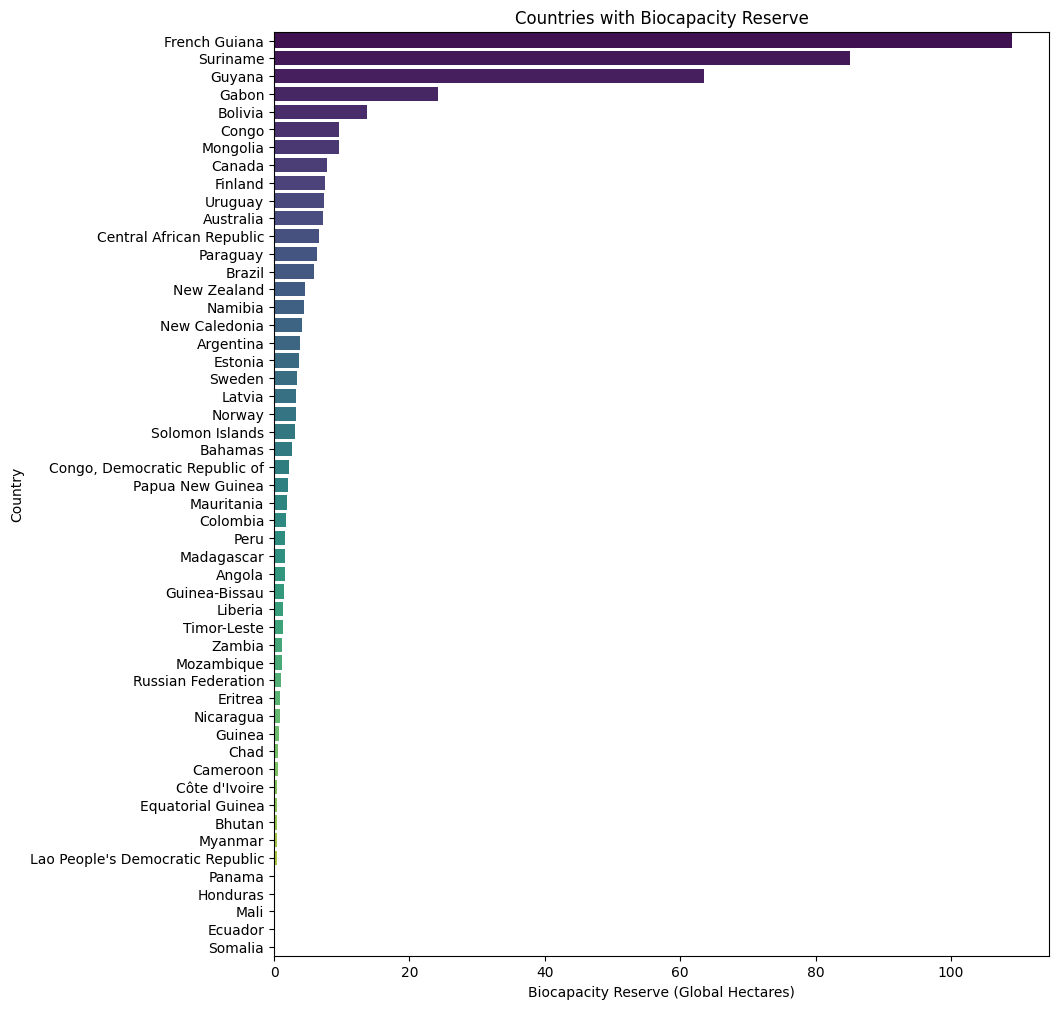

In [14]:
global_eco_bio_positive = global_eco_bio_positive.sort_values('Biocapacity Deficit or Reserve', ascending=False )

plt.figure(figsize=(10,12))

sns.barplot(
    data=global_eco_bio_positive,
    x='Biocapacity Deficit or Reserve',
    y='Country',
    palette='viridis'
)

plt.title('Countries with Biocapacity Reserve')
plt.xlabel('Biocapacity Reserve (Global Hectares)')
plt.ylabel('Country')
plt.show()

Interactive World Map of Countries with Biocapacity Reserves

In [16]:
fig = px.choropleth(
    global_eco_bio_positive,
    locations="Country",
    locationmode='country names',
    color="Biocapacity Deficit or Reserve",

    hover_data={
        "Biocapacity Deficit or Reserve": ":.2f",
        "Earths Required": ":.2f",
        "Countries Required": ":.2f",
        "Country": False
    },
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Turbo,
    title="World Map of Countries with Biocapacity Reserves (with extra info)"
)
fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))
fig.show(renderer="iframe")

Countries required for Nations with the Highest Biocapacity Reserves. For example, how many Australia's does Australia need to meet it's residents demand on nature

/tmp/ipython-input-2976921541.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2976921541.py:15: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



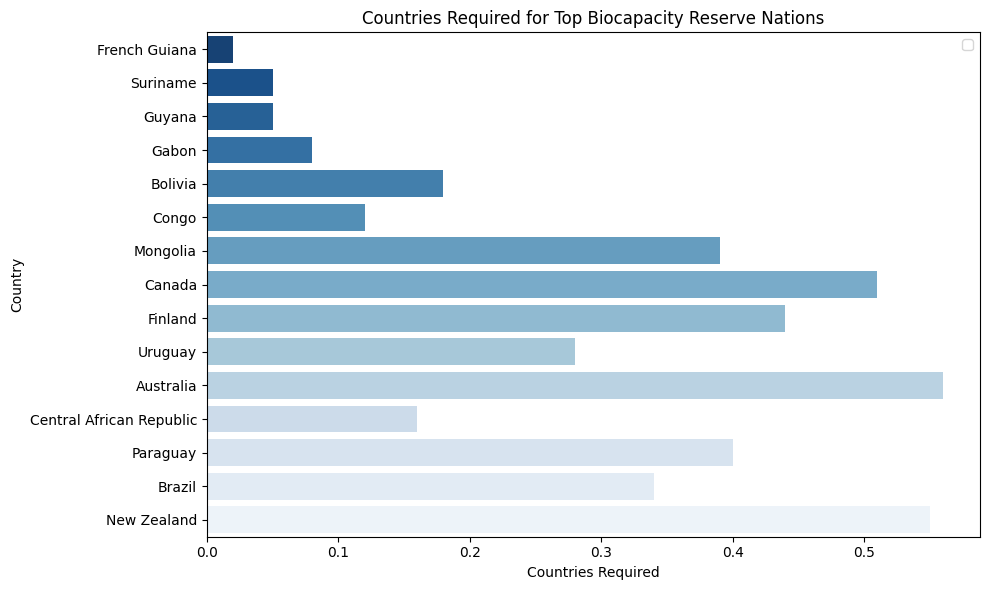

In [17]:
top_reserve = global_eco_bio_positive.sort_values('Biocapacity Deficit or Reserve', ascending = False).head(15)

plt.figure(figsize=(10,6))

sns.barplot(
    data= top_reserve,
    x='Countries Required',
    y='Country',
    palette='Blues_r'
    )


plt.title('Countries Required for Top Biocapacity Reserve Nations')
plt.xlabel('Countries Required')
plt.legend()
plt.tight_layout()

plt.show()

In [18]:
global_eco_bio_negative = global_eco_footprint[global_eco_footprint['Biocapacity Deficit or Reserve'] < 0]

global_eco_bio_negative.head(10)

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2
6,Armenia,Middle East/Central Asia,2.97,0.73,"$3,426.39",0.74,0.18,0.34,0.89,0.01,...,0.44,0.26,0.10,0.02,0.07,0.89,-1.35,1.29,2.52,3B
7,Aruba,Latin America,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.57,-11.31,6.86,20.69,2
9,Austria,European Union,8.46,0.88,"$51,274.10",0.82,0.27,0.63,4.14,0.06,...,0.71,0.16,2.04,0.00,0.15,3.07,-3.00,3.50,1.98,5
10,Azerbaijan,Middle East/Central Asia,9.31,0.75,"$7,106.04",0.66,0.22,0.11,1.25,0.01,...,0.46,0.20,0.11,0.02,0.06,0.85,-1.46,1.33,2.72,6
12,Bahrain,Middle East/Central Asia,1.32,0.82,"$24,299.00",0.52,0.45,0.16,6.19,0.07,...,0.01,0.00,0.00,0.46,0.10,0.58,-6.91,4.33,12.96,3L
13,Bangladesh,Asia-Pacific,154.70,0.56,$857.50,0.29,0.00,0.08,0.26,0.02,...,0.25,0.00,0.00,0.05,0.07,0.38,-0.35,0.42,1.92,6


Countries with Biocapacity Deficit.

One global hectare is the world's annual amount of biological production for human use and human waste assimilation per hectare of biologically productive land and fisheries

/tmp/ipython-input-676133376.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




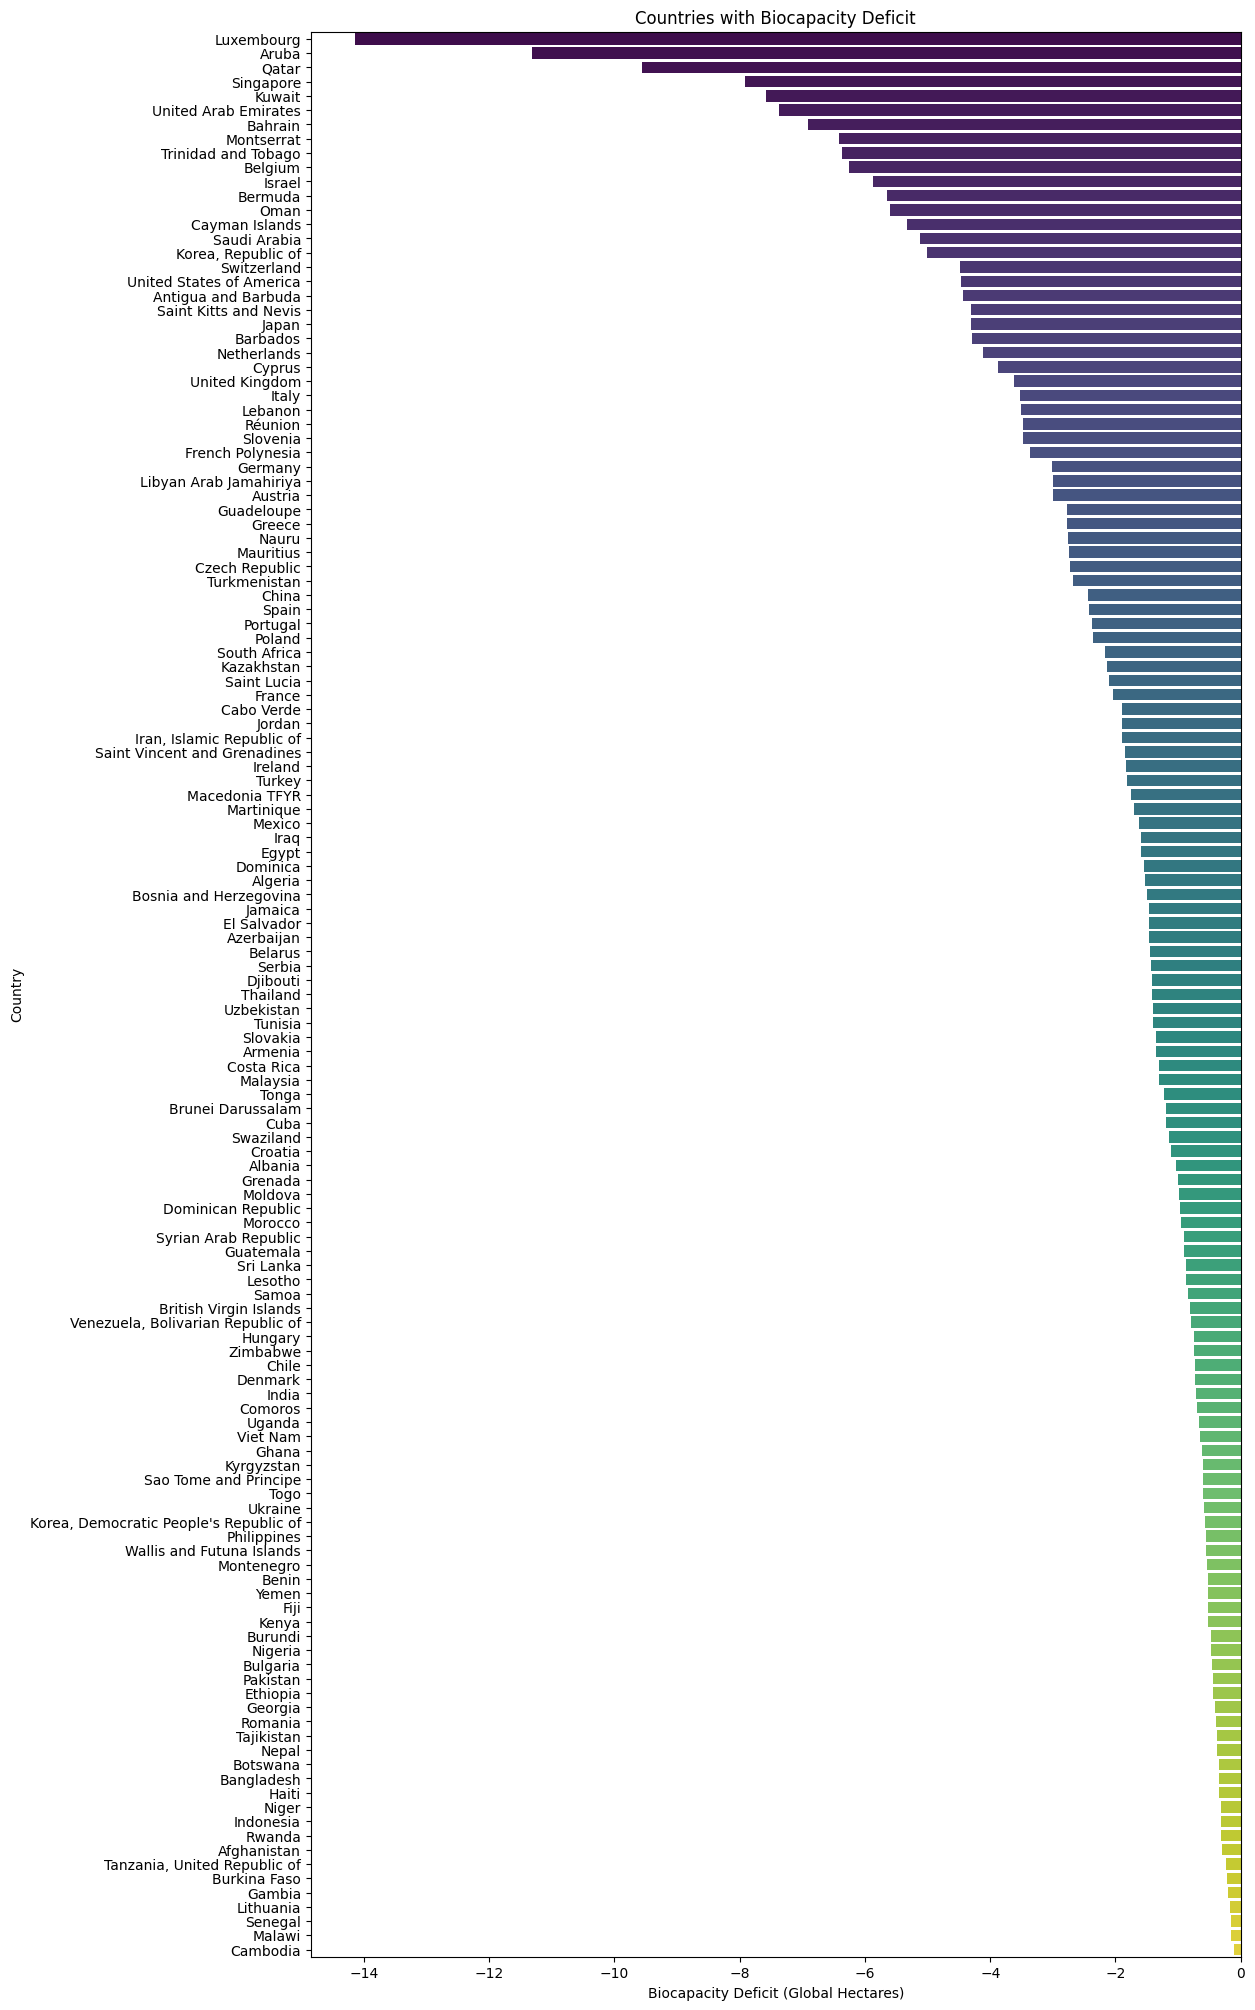

In [19]:
global_eco_bio_negative = global_eco_bio_negative.sort_values('Biocapacity Deficit or Reserve', ascending=True )

plt.figure(figsize=(12,25))

sns.barplot(
    data=global_eco_bio_negative,
    x='Biocapacity Deficit or Reserve',
    y='Country',
    palette='viridis'
)

plt.title('Countries with Biocapacity Deficit')
plt.xlabel('Biocapacity Deficit (Global Hectares)')
plt.ylabel('Country')
plt.show()

Interactive World Map of Countries with Biocapacity Deficit

In [20]:
fig = px.choropleth(
    global_eco_bio_negative,
    locations="Country",
    locationmode='country names',
    color="Biocapacity Deficit or Reserve",

    hover_data={
        "Biocapacity Deficit or Reserve": ":.2f",
        "Earths Required": ":.2f",
        "Countries Required": ":.2f",
        "Country": False
    },
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Turbo,
    title="World Map of Countries with a Biocapacity Deficit (with extra info)"
)
fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))
fig.show(renderer="iframe")

Countries Required for Nations with the largest Biocapacity Deficit. Singapore has a value of over 150 countries required for it's own sustainability. This is because Singapore is a very small island with high consumption, so it relies almost entirely on external biocapacity

/tmp/ipython-input-1181919165.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-1181919165.py:15: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



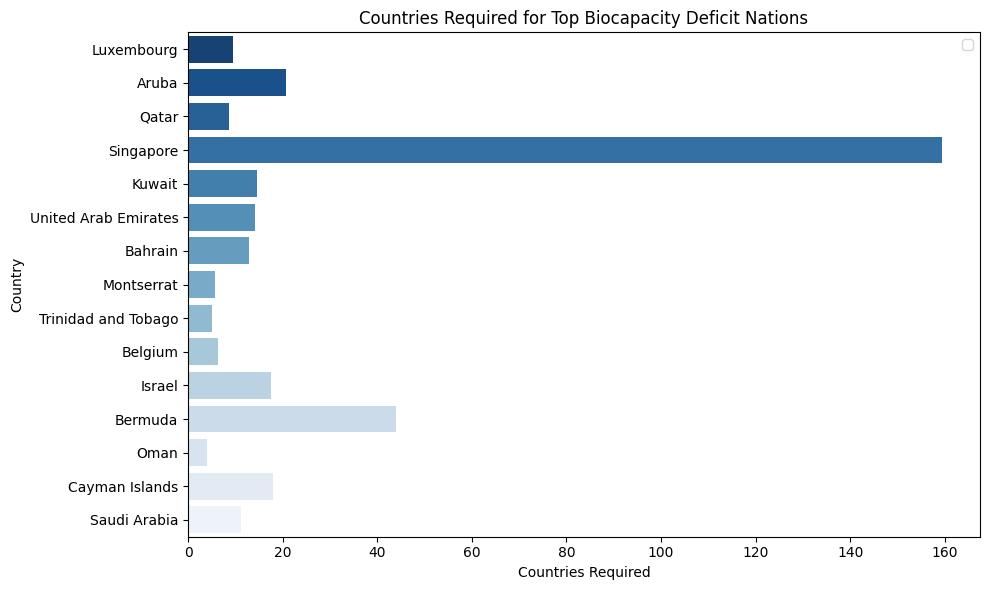

In [21]:
top_negative = global_eco_bio_negative.sort_values('Biocapacity Deficit or Reserve', ascending=True).head(15)

plt.figure(figsize=(10,6))

sns.barplot(
    data= top_negative,
    x='Countries Required',
    y='Country',
    palette='Blues_r'
    )


plt.title('Countries Required for Top Biocapacity Deficit Nations')
plt.xlabel('Countries Required')
plt.legend()
plt.tight_layout()

plt.show()

Percentage of Countries with Biocapacity Reserve and Biocapacity Deficit.

Only 27.7% of the worlds countries have a biocapacity reserve. 72.3% of the worlds countries are in biocapacity deficit

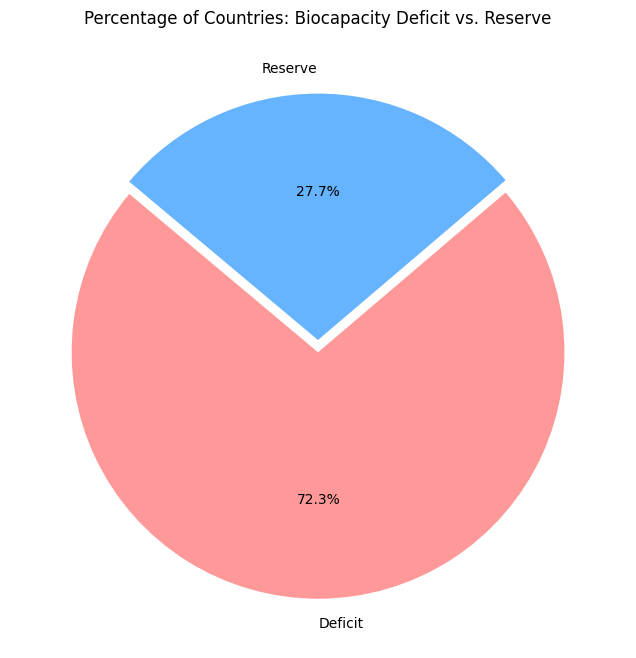

In [22]:
def classify_status(value):
    if value > 0:
        return 'Reserve'
    else:
        return 'Deficit'

global_eco_footprint= global_eco_footprint.copy()

global_eco_footprint['Bio_Status'] = global_eco_footprint[
    'Biocapacity Deficit or Reserve'].apply(classify_status)

status_counts = global_eco_footprint['Bio_Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#ff9999','#66b3ff'],
    explode=(0.05, 0)
)
plt.title('Percentage of Countries: Biocapacity Deficit vs. Reserve')
plt.show()

Top Fifteen Countries by Earths Required.

The vertical black line at 1.0 visually demonstrates how far beyond the planet's regenerative capacity these nations are living

/tmp/ipython-input-3892280093.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




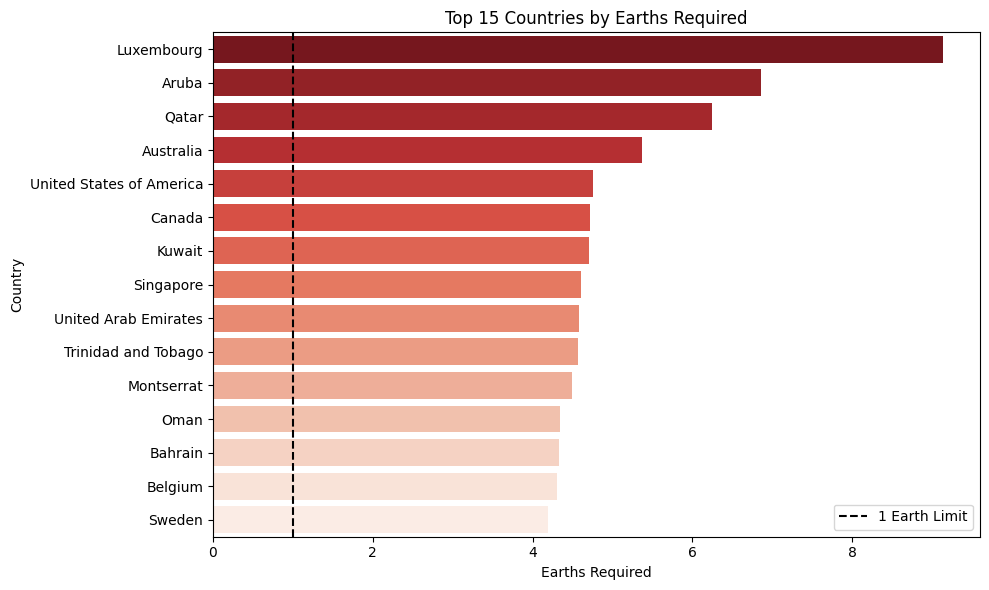

In [23]:
top_earths = global_eco_footprint.sort_values('Earths Required', ascending=False).head(15)

plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_earths,
    x='Earths Required',
    y='Country',
    palette='Reds_r'
)

plt.axvline(1.0, color='black', linestyle='--', label= '1 Earth Limit')

plt.title('Top 15 Countries by Earths Required')
plt.legend()
plt.tight_layout()

plt.show()

Average Biocapacity Deficit by Region

/tmp/ipython-input-3770363770.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




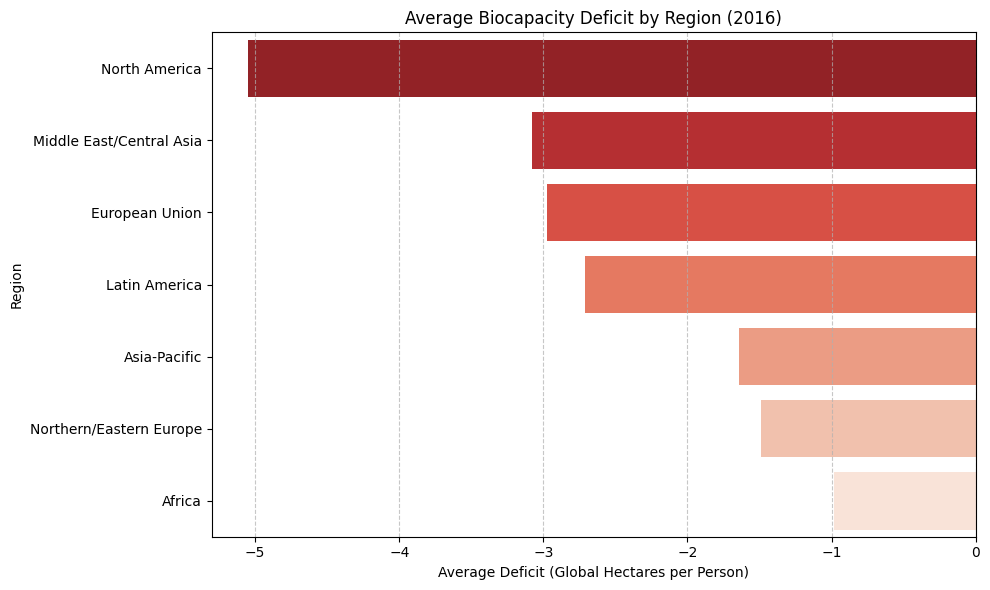

In [24]:
global_eco_bio_negative = global_eco_footprint[global_eco_footprint['Biocapacity Deficit or Reserve'] < 0].copy()
regional_avg_deficit = global_eco_bio_negative.groupby('Region')['Biocapacity Deficit or Reserve'].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=regional_avg_deficit.values, y=regional_avg_deficit.index, palette="Reds_r")

plt.title('Average Biocapacity Deficit by Region (2016)')
plt.xlabel('Average Deficit (Global Hectares per Person)')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('average_biocapacity_deficit.png')

Correlation Chart: Human Development Index vs Ecological Footprint.

The correlation coefficient is 0.73 which indicates a strong positive correlation between human development and total ecological footprint. The outlier at the top of the chart is Luxembourg, It's total footprint is 15.82 (the highest of all the countries in this dataset) and it's carbon footprint is 12.65 GHA, So around 80% of Luxembourg's ecological impact comes from carbon emissions alone

Correlation Coefficient: 0.73


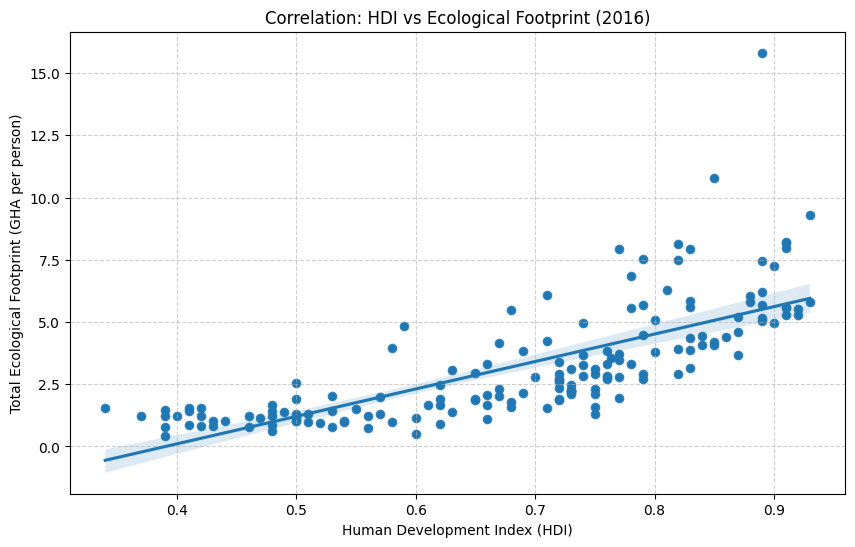

In [25]:
correlation = global_eco_footprint_clean['HDI'].corr(global_eco_footprint_clean['Total Ecological Footprint'])
print(f"Correlation Coefficient: {correlation:.2f}")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=global_eco_footprint_clean, x='HDI', y='Total Ecological Footprint')
sns.regplot(data=global_eco_footprint_clean, x='HDI', y='Total Ecological Footprint')

plt.title('Correlation: HDI vs Ecological Footprint (2016)')
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Total Ecological Footprint (GHA per person)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Correlation Charts: Ecological Footprint vs Gross Domestic Product per Capita and Human Development Index vs GDP per Capita.

GDP vs Ecological Footprint: (0.80) This shows a strong positive correlation, as a countries economic output per person increases, its ecological footprint rises.
GDP vs HDI: (0.68) This shows a moderate to strong positive correlation, Wealthier countries generally have higher human development but the trend line here plateaus for wealthy nations as you can't get HDI higher than 1.0

                            GDP per Capita       HDI  \
GDP per Capita                    1.000000  0.677448   
HDI                               0.677448  1.000000   
Total Ecological Footprint        0.801901  0.738829   

                            Total Ecological Footprint  
GDP per Capita                                0.801901  
HDI                                           0.738829  
Total Ecological Footprint                    1.000000  


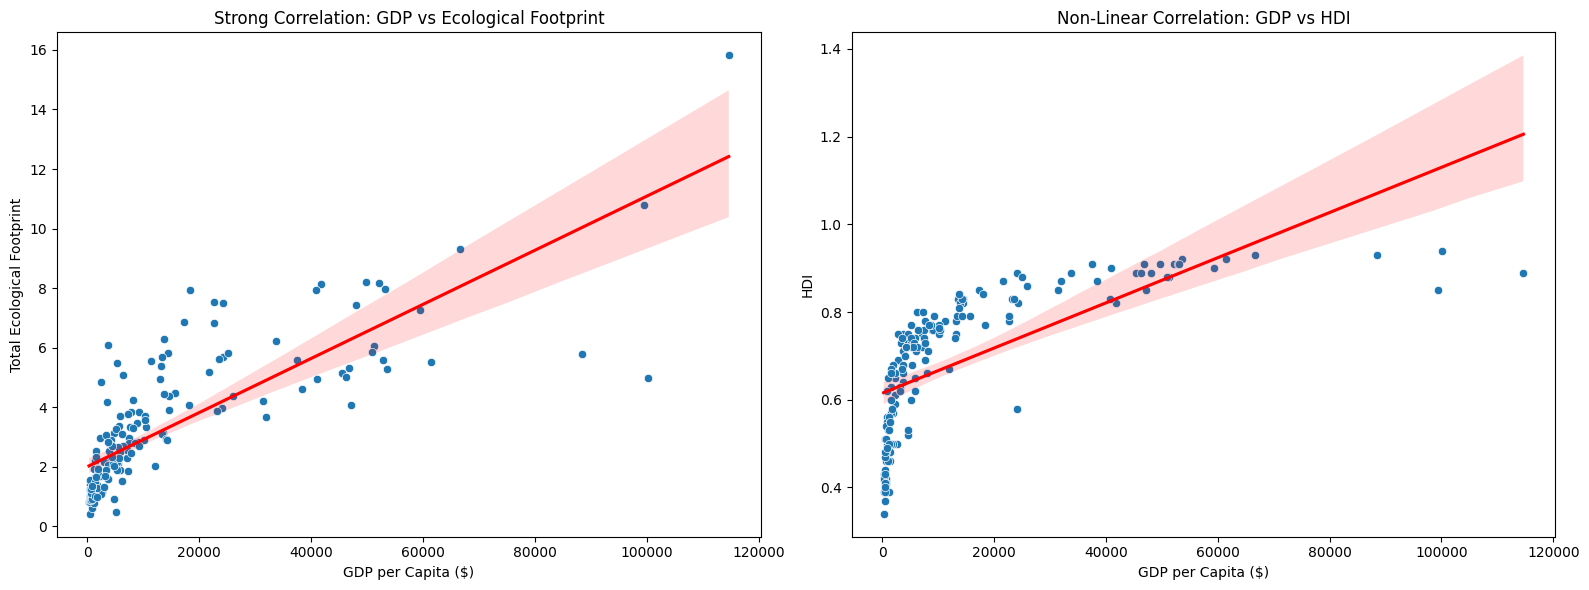

In [26]:
global_eco_footprint_clean_two = global_eco_footprint.dropna(subset=['GDP per Capita', 'HDI', 'Total Ecological Footprint']).copy()
global_eco_footprint_clean_two['GDP per Capita'] = global_eco_footprint_clean_two['GDP per Capita'].astype(str).str.replace('$', '').str.replace(',', '')
global_eco_footprint_clean_two['GDP per Capita'] = pd.to_numeric(global_eco_footprint_clean_two['GDP per Capita'])

correlation_matrix = global_eco_footprint_clean_two[['GDP per Capita', 'HDI', 'Total Ecological Footprint']].corr()
print(correlation_matrix)

fig, axes= plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(data= global_eco_footprint_clean_two, x='GDP per Capita', y='Total Ecological Footprint', ax=axes[0])
sns.regplot(data= global_eco_footprint_clean_two, x='GDP per Capita', y='Total Ecological Footprint', scatter= False, color='red',ax=axes[0])
axes[0].set_title('Strong Correlation: GDP vs Ecological Footprint')
axes[0].set_xlabel('GDP per Capita ($)')

sns.scatterplot(data=global_eco_footprint_clean_two, x='GDP per Capita', y='HDI', ax=axes[1])
sns.regplot(data=global_eco_footprint_clean_two, x='GDP per Capita', y='HDI', scatter=False, color='red', ax=axes[1])
axes[1].set_title('Non-Linear Correlation: GDP vs HDI')
axes[1].set_xlabel('GDP per Capita ($)')

plt.tight_layout()
plt.savefig('gdp_analysis.png')

Key Insights & Observations
Socioeconomic Correlations

Development vs. Consumption: Analysis indicates a robust positive correlation between a nation's Total Ecological Footprint and its Human Development Index (HDI). Similarly, there is a strong correlation between Total Ecological Footprint and GDP per capita, implying that higher standards of living currently necessitate higher resource consumption.

Economic Indicators: There is a moderate-to-strong correlation between HDI and GDP per capita, confirming the link between economic output and overall human development outcomes.

Global Biocapacity Status

Deficit vs. Reserve: The majority of the world is operating unsustainably. Only 27.7% of nations maintain a biocapacity reserve, while the remaining 72.3% operate in a biocapacity deficit, consuming more resources than their ecosystems can regenerate.

Extreme Deficits (Luxembourg): Luxembourg exhibits the most severe biocapacity deficit globally, estimated at -14 global hectares (gha) per person. To sustain this level of consumption globally, approximately nine Earths would be required.

Dependency Ratios (Singapore): Singapore records the highest "Countries Required" metric. This underscores the challenges faced by geographically small, densely populated nations with limited natural capital; they are heavily reliant on external biocapacity to sustain their population.

Regional Analysis

Regional Deficits: When analyzing average biological deficits by region, North America ranks as the region with the highest deficit, followed by the Middle East/Central Asia and the European Union.

Regional Reserves: Conversely, Africa and Northern/Eastern Europe generally maintain lower average deficits compared to the aforementioned high-consumption regions.

Ecological Creditors

Top Reserves: South America hosts the most significant ecological creditors. French Guiana holds the largest biocapacity reserve (>100 gha), followed closely by Suriname (>80 gha).

Future Outlook

Sustainability Gap: The aggregate data strongly suggests that current consumption levels exceed the Earth's natural sustainability limits. Without significant intervention, this ecological deficit is forecasted to increase year-on-year in tandem with global population growth.